# 数值分析

## 导论

### 误差

- 模型误差：实际问题和对其进行抽象、简化后得到的数学模型之间存在的误差
- 观测误差：由于精度的限制，观察和测量时候产生 的误差
- 舍入误差：计算机字长的限制，所能表示的数只能有有限的位数，后面的部分按照不同的舍入规则舍去而产生的误差
- 截断/方法误差：得不到精确解的数学模型通常用数值方法求近似解，二者之间的误差。通常是用有限过程对无穷进行截断

误差限与有效数字的关系

- 绝对误差限等于末位有效数字的半个单位

- 除以近似值即得相对误差限，直接求可由公式$\varepsilon_r^*\leq\frac{1}{2a_1}\times10^{-n+1} $得出

使$\sqrt20$的近似值的相对误差限小于0.1%,要取几位有效数字

$\sqrt20=4.4\cdots$

由$\varepsilon_r^*\leq\frac{1}{2*4}\times10^{-n+1} $,取n=4即符合条件

函数的误差限

<img src='https://pic3.zhimg.com/v2-e392ebb82a5c5b25d4ea2795b4b48522_r.jpg' width='70%'>

放缩可得$\varepsilon(f(x^*))\leq max|f'(x^*)|\varepsilon(x^*)$

多元函数将不同自变量的项加起来即可

取$\sqrt3=1.732$,试分析$f(\sqrt3)$的误差上限，$f(x)=x^2$

$max|f'(x*)|=2*1.7325=3.465$

$\varepsilon(x^*)=0.5*10^-3$

$\varepsilon(f(x^*))\leq3.465*0.5*10^-3=0.00173245$

一个算法如果输入数据有误差，而在计算过程中舍入误差不增长，则称此算法是数值稳定的，否则是不稳定的

相对误差比值：$|\frac{f(x)-f(x^*)}{f(x^*)}|/|\frac{\Delta x}{x}\approx |\frac{xf'(x)}{f(x)}|=C_p$

$C_p\geq10$时则称此问题是病态的

数值运算的误差估计

<img src='https://pic1.zhimg.com/80/v2-571d81a0b2d4c9c46025de59c7d7e718_1440w.jpg'>

数值计算的基本原则

- 选择数值稳定性好的计算公式

- 防止被除数(分子)远大于除数(分母)

- 防止相近的数相减(→使用有理化，三角变换等。)

- 防止大数吃小数

- 简化计算步骤

### 算法设计

#### 秦九韶算法

$\begin{cases}\ b_0=a_0\\ b_i=b_{i-1}*x^*+a_i \;i=1,2,3\cdots n \end{cases}$

$b_n=p(x^*)$即为所求

$p(x)=(x-x^*)(b_0x^{n-1}+b_1x^{n-2}+\cdots+b_{n-1})+b_n$

右边相乘错位相消可得左边

求到得$p'(x)=q(x)+(x-x^*)q'(x)$

$q(x)=b_0x^{n-1}+b_1x^{n-2}+\cdots+b_{n-1}$

故$p'(x^*)=q(x*)$

设$p(x)=2x^4-3x^2+3x-4$,用秦九韶算法求p(-2)和p'(-2)

### 

In [34]:
para = [2, 0, -3, 3, -4]
b = []
c = []
x=-2
b.append(para[0])
for i in range(1, len(para)):
    b.append(b[i-1]*x+para[i])
print(f'p({x})={b[len(b)-1]}')
c.append(b[0])
for i in range(1, len(b)-1):
    c.append(c[i-1]*x+b[i])
print(f'p\'({x})={c[len(c)-1]}')


p(-2)=10
p'(-2)=-49


迭代法

将自变量设置为$x_0+\Delta x$,分别为近似初值和迭代量，忽略较高阶小量（例如$\Delta x^2$）,将增量表示为初值和已知系数表示的形式进而得到x的迭代公式（$x_k=x_{k-1}+\Delta x$），不断迭代得到精确值

用迭代法求$\sqrt3,取x_0=2$,迭代到误差小于$\frac{1}{2}*10^-10$

$x^2=a$的迭代公式为$x_k=\frac{1}{2}(x_{k-1}+\frac{a}{x_{k-1}})$


√3=1.7320508075688772


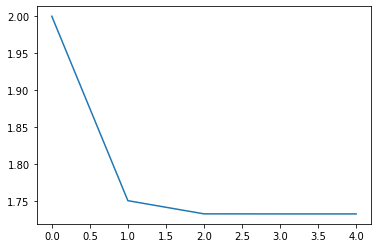

In [84]:
# len(s)-s.rfind('0')-1 #有效数字个数
import matplotlib.pyplot as plt
import numpy as np
import math
x=[2.0]
a=3
sign_width=8
for i in range(1,100):
    ans=(x[i-1]+a/x[i-1])/2
    x.append(ans)
    if(abs(math.sqrt(3)-ans)<0.5*10**-10):
        print(f'√{a}={ans}')
        break
plt.plot(np.arange(0,len(x)),x)

### 定积分

- 梯形法：$I(f)\approx \frac{b-a}{2}[f(b)+f(a)]$

  化整为零：$x_i=a+ih;h=\frac{b-a}{n}$

  $I(f)\approx \sum_{i=1}^n\frac{h}{2}[f(x_i)+f(x_{i-1})]=\sum_{i=0}^nf(x_i)-\frac{h}{2}(f(a)+f(b))$
 
  取足够大的n即可得到较精确的积分值

- 抛物线法(松弛法)
 
  松弛法$S_{i}=I_{i+1}+\omega(I_{i+1}-I_i)$

  取$\omega=\frac{1}{3}$,可得$S_i=\frac{\Delta x}{3}(f(i-1)+4f(i)+f(i+1)$

- 以$[x_{i-1},x_{i+1}]$为底的曲边梯形的面积为

<img src="https://www.zhihu.com/equation?tex=++%5Cbegin%7Bsplit%7D+++++%5Cint_%7Bx_%7Bi-1%7D%7D%5E%7Bx_%7Bi%2B1%7D%7D%28px%5E2%2Bqx%2Br%29dx%3D%26p%5B%5Cfrac%7Bx%5E3%7D%7B3%7D%5D_%7Bx_%7Bi-1%7D%7D%5E%7Bx_%7Bi%2B1%7D%7D%2Bq%5B%5Cfrac%7Bx%5E2%7D%7B2%7D%5D_%7Bx_%7Bi-1%7D%7D%5E%7Bx_%7Bi%2B1%7D%7D%2Br%5Bx%5D_%7Bx_%7Bi-1%7D%7D%5E%7Bx_%7Bi%2B1%7D%7D%5C%5C+++++%3D%26%5Cfrac%7Bp%7D%7B3%7D%28x_%7Bi%2B1%7D%5E3-x_%7Bi-1%7D%5E3%29%2B%5Cfrac%7Bq%7D%7B2%7D%28x_%7Bi%2B1%7D%5E2-x_%7Bi-1%7D%5E%29%2Bc%28x_%7Bi%2B1%7D-x_%7Bi-1%7D%29%5C%5C+++++%3D%26%28x_%7Bi%2B1%7D-x_%7Bi-1%7D%29%5B%5Cfrac%7Bp%7D%7B3%7D%28x_%7Bi%2B1%7D%5E2+%2Bx_%7Bi%2B1%7Dx_%7Bi-1%7D%2Bx_%7Bi-1%7D%5E2%29%2B%5Cfrac%7Bq%7D%7B2%7D%28x_%7Bi%2B1%7D%2Bx_%7Bi-1%7D%29%2Br%5D%5C%5C+++++%3D%26%5Cfrac%7B1%7D%7B6%7D%5Ccdot%282%5CDelta+x%29%5Ccdot%5B2p%28x_%7Bi%2B1%7D%5E2+%2Bx_%7Bi%2B1%7Dx_%7Bi-1%7D%2Bx_%7Bi-1%7D%5E2%29%2B3q%28x_%7Bi%2B1%7D%2Bx_%7Bi-1%7D%29%2B6r%5D%5C%5C+++++%3D%26%5Cfrac%7B1%7D%7B6%7D%5Ccdot%282%5CDelta+x%29%5Ccdot%5Bp%28x_%7Bi%2B1%7D%5E2+%2B%28x_%7Bi-1%7D%2Bx_%7Bi%2B1%7D%29%5E2%2Bx_%7Bi-1%7D%5E2%29%2B3q%28x_%7Bi%2B1%7D%2Bx_%7Bi-1%7D%29%2B6r%5D%5C%5C+++++%3D%26%5Cfrac%7B1%7D%7B6%7D%5Ccdot%282%5CDelta+x%29%5Ccdot%5Bp%28x_%7Bi%2B1%7D%5E2+%2B4x_i%5E2%2Bx_%7Bi-1%7D%5E2%29%2Bq%28x_%7Bi%2B1%7D%2B4x_i%2Bx_%7Bi-1%7D%29%2B%28r%2B4r%2Br%29%5D%5C%5C+++++%3D%26%5Cfrac%7B1%7D%7B6%7D%5Ccdot%282%5CDelta+x%29%5Ccdot%5B%28px_%7Bi-1%7D%5E2%2Bqx_%7Bi-1%7D%2Br%29%2B4%28px_i%5E2%2Bqx_i%2Br%29%2B%28px_%7Bi%2B1%7D%5E2%2Bqx_%7Bi%2B1%7D%2Br%29%5D%5C%5C+++++%3D%26%5Cfrac%7B1%7D%7B6%7D%5Ccdot%282%5CDelta+x%29%5Ccdot%28y_%7Bi-1%7D%2B4y_i%2By_%7Bi%2B1%7D%29.+++%5Cend%7Bsplit%7D+%5C%5C">



抛物线法公式简化见下方程序

标准结果: 3.141592653589793
误差限： 3.487868498008632e-14
求和结果： 3.1413342637004176
梯形法结果： 3.1413342637004176
抛物线法结果： 3.141592670592885


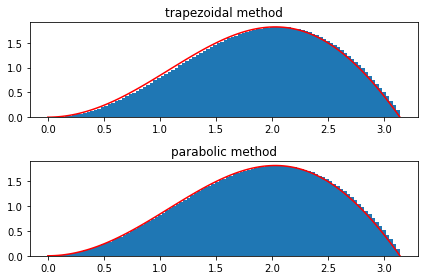

In [1]:
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np


def f(x):
    return np.sin(x)*x


a = 0
b = np.pi


fArea, err = integrate.quad(f, a, b)  # 返回积分值和绝对误差absolute error
print("标准结果:", fArea)  # 标准值
print("误差限：",err)


n = 100
dx = (b-a)/n
x = np.linspace(a, b, n+1)
y = f(x)

I = np.sum(y*dx)  # 求和
print('求和结果：', I)

I1 = I-dx/2.0*(y[0]+y[n])  # 修正为梯形法
print('梯形法结果：', I)

y1 = y[1:n]  # !截去端点 delete只能作用于整行整列
y1 = np.asarray([(-1)**i*y1[i] for i in range(0, n-1)])  # 下标奇数项取负，反之取正
# !要转成nparray否则不能乘浮点数
I = I+1/3.0*np.sum(y1*dx)-2*dx/3.0*(y[0]+y[n])  # 修正为抛物线法
print('抛物线法结果：', I)

# for i,j in zip(x,y):
#     print(i,j)
fig, mat = plt.subplots(2, 1)

for i in range(1, n):
    y[i] = (f(x[i-1])+f(x[i]))/2.0
if(len(y) != len(x)-1):
    y = y[:len(x)-1]  # 剔除末元素使长度吻合
mat[0].stairs(y, x, fill=True)  # *一列时不能有列索引
mat[0].plot(x, f(x), 'r')
mat[1].plot(x, f(x), 'r')
# mat[0].plot(x[:len(x)-1],y)

mat[0].set_title('trapezoidal method')
y = []
n *= 2  # !使两种方法的图像具有相同的格数
x = np.linspace(a, b, n+1)
for i in range(0, n-1, 2):  #左端点代表整个区间的值
    y.append((f(x[i])+4*f(x[i+1])+f(x[i+2]))/6.0)

x = np.linspace(a, b, n/2)
# for i,j in zip(x,y):
#     print(i,j)
if(len(y) != len(x)-1):
    y = y[:len(x)-1]
mat[1].stairs(y, x, fill=True)
# mat[1].plot(x[:len(x)-1],y)
# !mat[1].bar(x[:int(n/2)], y[:int(n/2)],width=-1, bar='edge')#edge默认对齐左边，传递负宽度右对齐,左对齐会导致阶梯图斜率为负时图像失真
# !step图不能设置fill
# !stairs图x,y位置与一般图相反，且x是区间端点，比y长一位
mat[1].set_title('parabolic method')
fig.tight_layout()  # !使子图标题不重叠
#fig.show() ipython不需要


蒙特卡洛积分

求$\int_0^1dx\int_0^{\sqrt{1-x^2}}\sqrt{1-x^2-y^2}dy$

标准答案用极坐标代换可得

<img src="http://netedu.xauat.edu.cn/jpkc/netedu/jpkc/gdsx/homepage/5jxsd/51/513/5309/530902.files/image261.gif">



标准结果是： 0.5235987755982989
误差限为： 8.833789255646707e-11
蒙特卡洛模拟积分结果为 0.525


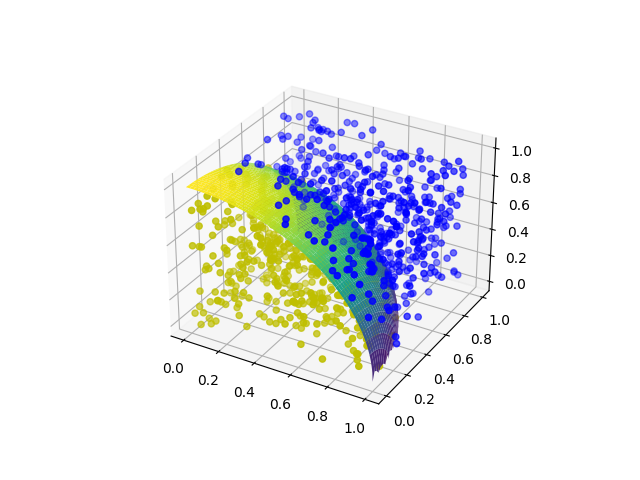

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import integrate

%matplotlib widget



def f(x, y):
    return np.sqrt(1-x*x-y*y)


def in_bounds(x, y):
    return x*x+y*y <= 1


def h(x):
    return np.sqrt(1-x*x)


N = 1000
beg_x = 0
beg_y = 0
beg_z = 0
len_x = 1
len_y = 1
len_z = 1
v, err = integrate.dblquad(f, beg_x, beg_x+len_x, lambda x: beg_y, h)
print('标准结果是：',v)
print('误差限为：',err)
V = len_x*len_y*len_z
n = 0
x = 0
y = 0
z = 0
list_x_out = []  # 点阵数组
list_y_out = []
list_z_out = []
list_x_in = []
list_y_in = []
list_z_in = []
for i in range(0, N):
    x = beg_x+np.random.random()*len_x
    y = beg_y+np.random.random()*len_y
    z = beg_z+np.random.random()*len_z

    if in_bounds(x, y) and z <= f(x, y):
        n += 1
        list_x_in.append(x)
        list_y_in.append(y)
        list_z_in.append(z)
    else:
        list_x_out.append(x)
        list_y_out.append(y)
        list_z_out.append(z)

print("蒙特卡洛模拟积分结果为", n/N*V)
fig = plt.figure()
# 创建3d绘图区域
x = np.linspace(0, 1, 500)
y = x.copy()
ax = plt.axes(projection='3d')  # 添加三维轴
X, Y = np.meshgrid(x, y)  # 绘制网格
z = 1-X*X-Y*Y
z[z < 0] = np.nan  # 用布尔数组筛去圆域外的区域
Z = np.sqrt(z)  # 传入矩形区域中符合函数参数要求的部分
# Z[X*X+Y*Y>1]=np.nan 限定绘图区域，这里并不需要
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none') # colormap是翠绿色渐变
ax.scatter3D(list_x_in, list_y_in, list_z_in,c='y')
ax.scatter3D(list_x_out, list_y_out, list_z_out,c='b')


matlab代码

```matlab
f = @(x, y) sqrt(1 - x .* x - y .* y);

in_bounds = @(x, y) x .* x + y .* y <= 1;

h = @(x) sqrt(1 - x .* x);

N = 1000;
beg_x = 0;
beg_y = 0;
beg_z = 0;
len_x = 1;
len_y = 1;
len_z = 1;
v = integral2(f, beg_x, beg_x + len_x, beg_y, h);
fprintf("stardard answer is:%f\n", v);
V = len_x .* len_y .* len_z;
n = 0;
x = 0;
y = 0;
z = 0;
list_x_out = []; % 点阵数组
list_y_out = [];
list_z_out = [];
list_x_in = [];
list_y_in = [];
list_z_in = [];

for i = 1:N
    x = beg_x + rand(1, 1) .* len_x;
    y = beg_y + rand(1, 1) .* len_y;
    z = beg_z + rand(1, 1) .* len_z;

    if in_bounds(x, y) && z <= f(x, y)
        n = n + 1;
        list_x_in = [list_x_in; x];
        list_y_in = [list_y_in; y];
        list_z_in = [list_z_in; z];
    else
        list_x_out = [list_x_out; x];
        list_y_out = [list_y_out; y];
        list_z_out = [list_z_out; z];
    end

end

fprintf("The Monte Carlo simulation result is:%f", n / N .* V);
fig = figure;
x = linspace(0, 1, 500);
y = x;
[X, Y] = meshgrid(x, y); % 绘制网格
z = 1 - X .* X - Y .* Y;
z(z < 0) = NaN; % 用布尔数组筛去圆域外的区域
Z = sqrt(z); % 传入矩形区域中符合函数参数要求的部分
surf(X, Y, Z, EdgeColor = 'none');
hold on %避免被刷新
scatter3(list_x_in, list_y_in, list_z_in, 'y');
scatter3(list_x_out, list_y_out, list_z_out,'b');


```

平均值法

```matlab
f = @(x, y) sqrt(1 - x .* x - y .* y);

in_bounds = @(x, y) x .* x + y .* y <= 1;

sum=0;
N=1000;
n=0;
for i=1:N^2
    x=rand();%替换为等间距点也可以
    y=rand();
    if in_bounds(x,y) 
        n=n+1;
        sum=sum+f(x,y);
    end  
end
ave=sum/n;
s=n/N^2;
result=ave*s


```

牛顿法求$\sqrt 115$,根据$f(x)=1-a/x^2=0$

$\varphi(x)=\frac{3}{2}x-\frac{x^3}{230}$

In [2]:
import numpy as np
import math

def phi(x):
    return 1.5*x-x**3/230

x=[11]

for i in range(1,10):
    x.append(phi(x[i-1]))
print(x)
print(math.sqrt(115))


[11, 10.71304347826087, 10.723789100239063, 10.723805294726926, 10.723805294763608, 10.723805294763608, 10.723805294763608, 10.723805294763608, 10.723805294763608, 10.723805294763608]
10.723805294763608
